In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading in the unemployment file
df = pd.read_csv('/Users/elainewu/Downloads/USUnemployment.csv')

In [5]:
#Reading in World Happiness file
df2015 = pd.read_csv('/Users/elainewu/Downloads/archive/2015.csv')
df2016 = pd.read_csv('/Users/elainewu/Downloads/archive/2016.csv')
df2017 = pd.read_csv('/Users/elainewu/Downloads/archive/2017.csv')
df2018 = pd.read_csv('/Users/elainewu/Downloads/archive/2018.csv')
df2019 = pd.read_csv('/Users/elainewu/Downloads/archive/2019.csv')

In [109]:
df2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [46]:
#inserting a new column that includes the years for each corresponding file 
df2015["Year"] = "2015"  
df2016["Year"] = "2016"  
df2017["Year"] = "2017"  
df2018["Year"] = "2018"  
df2019["Year"] = "2019"  

In [26]:
#Only viewing the countries in the United States because I am exploring unemployment rates in the United States
df2015_new = df2015[df2015['Country'].str.contains('United States')]
df2016_new = df2016[df2016['Country'].str.contains('United States')]
df2017_new = df2017[df2017['Country'].str.contains('United States')]
df2018_new = df2018[df2018['Country or region'].str.contains('United States')]
df2019_new = df2019[df2019['Country or region'].str.contains('United States')]

print(df2019_new)

    Overall rank Country or region  Score  GDP per capita  Social support  \
18            19     United States  6.892           1.433           1.457   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
18                    0.874                         0.454        0.28   

    Perceptions of corruption  Year  
18                      0.128  2019  


In [81]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,2015,NaN,NaN
1,United States,North America,13,7.104,NaN,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782,2016,7.02,7.188


In [82]:
happiness2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,18,United States,6.886,1.398,1.471,0.819,0.547,0.291,0.133,2018
1,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,2019


In [73]:
# combining the files into two different dataframes to easily plot out
happiness = pd.concat([df2015_new, df2016_new], ignore_index = True,
                      sort = False)
happiness2 = pd.concat([ df2018_new, df2019_new], ignore_index = True,
                      sort = False)

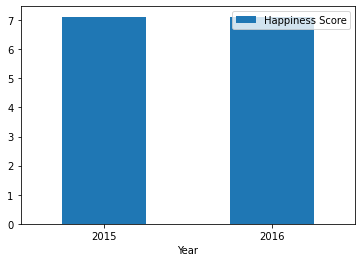

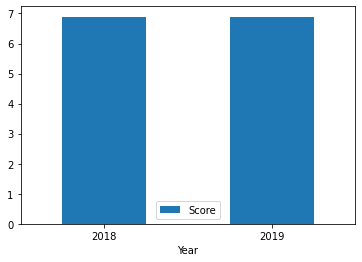

In [72]:
#After looking at the data from just the United States, it is not as helpful to correlate it to the unemployment rate
#because the numbers from the different years are very similar. This may be due to the averages among the whole US
# Thus, I will not be using this dataset and will be only looking at the unemployment in the US
ax = happiness.plot.bar(x='Year', y='Happiness Score', rot=0)
ax = happiness2.plot.bar(x='Year', y='Score', rot=0)

In [75]:
df.dtypes

Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object

In [74]:
#Previewing the first 5 rows from the unemployment dataset
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7


In [76]:
#Finding any null values 
print(df.isnull().sum())

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64


In [77]:
#Calculating the average of unemployment rate per year 
df['Mean'] = df.iloc[:, 2:13].mean(axis=1)

In [41]:
print(df)

    Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec      Mean
0   1948  3.4  3.8  4.0  3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4.0  3.781818
1   1949  4.3  4.7  5.0  5.3  6.1  6.2  6.7  6.8  6.6  7.9  6.4  6.6  6.209091
2   1950  6.5  6.4  6.3  5.8  5.5  5.4  5.0  4.5  4.4  4.2  4.2  4.3  5.090909
3   1951  3.7  3.4  3.4  3.1  3.0  3.2  3.1  3.1  3.3  3.5  3.5  3.1  3.245455
4   1952  3.2  3.1  2.9  2.9  3.0  3.0  3.2  3.4  3.1  3.0  2.8  2.7  3.009091
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
67  2015  5.7  5.5  5.4  5.4  5.6  5.3  5.2  5.1  5.0  5.0  5.1  5.0  5.236364
68  2016  4.9  4.9  5.0  5.0  4.8  4.9  4.8  4.9  5.0  4.9  4.7  4.7  4.872727
69  2017  4.7  4.6  4.4  4.4  4.4  4.3  4.3  4.4  4.2  4.1  4.2  4.1  4.309091
70  2018  4.1  4.1  4.0  4.0  3.8  4.0  3.8  3.8  3.7  3.8  3.7  3.9  3.872727
71  2019  4.0  3.8  3.8  3.6  3.6  3.7  3.7  3.7  3.5  3.6  3.5  3.5  3.636364

[72 rows x 14 columns]


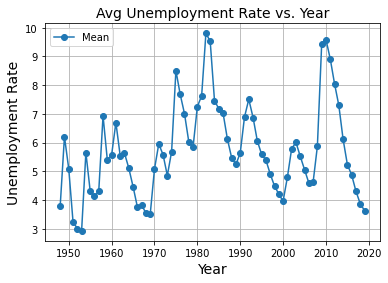

In [78]:
#Looking at the trend of average unemployment by year 
#It looks like the highest is in 1980 and coming in second is 2010 
lines = df.plot.line(x='Year', y='Mean', marker ='o')
plt.title('Avg Unemployment Rate vs. Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)

In [79]:
new_df = df.drop(columns=['Year', 'Mean'])

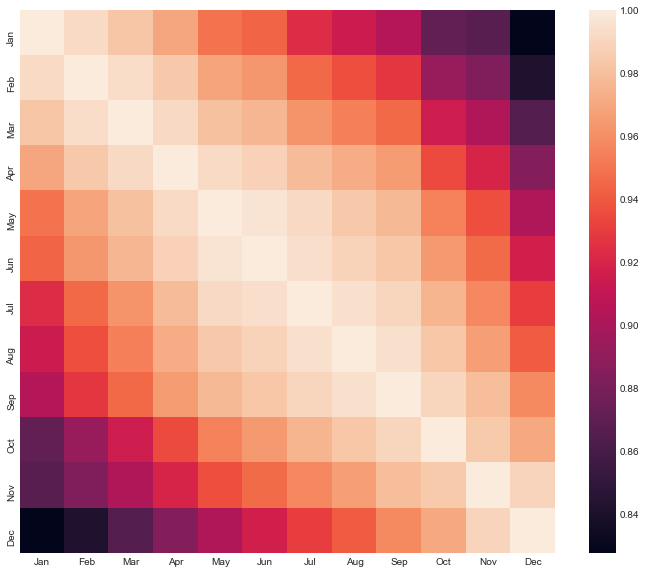

In [80]:
#plotting a heatmap graph to see the density of unemployment by season 
#It looks like there is less unemployment in the winter months 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr())
plt.show()

In [87]:
#looking for the lowest unemployment rate overall 
min_value = new_df.min(axis=1)
lowest = min_value.min()

In [88]:
lowest

2.5

In [89]:
#looking for the highest unemployment rate overall 
max_value = new_df.max(axis=1)
highest = max_value.max()

In [90]:
highest

10.8